In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
from collections import defaultdict


In [57]:
with open(r'D:\downloads from inet\poincare_metrics_runs (3).pkl', 'rb') as f:
    poincare_metrics = pickle.load(f)
with open(r'D:\downloads from inet\euclide_metrics_runs.pkl', 'rb') as f:
    euclide_metrics = pickle.load(f)

In [73]:
with open(r'D:\downloads from inet\poincare_metrics_runs (4).pkl', 'rb') as f:
    poincare_metrics_ment = pickle.load(f)
with open(r'D:\downloads from inet\euclide_metrics_runs (1).pkl', 'rb') as f:
    euclide_metrics_ment = pickle.load(f)

In [74]:
poincare_metrics.update(poincare_metrics_ment)
euclide_metrics.update(euclide_metrics_ment)


In [58]:
agg_metrics_pncr = defaultdict(dict)
agg_metrics_eucl = defaultdict(dict)

In [75]:
def min_size(runs):
    minimum = 10
    for run, metrics in runs.items():
        if len(metrics['accuracy']) < minimum:
            minimum = len(metrics['accuracy'])
    return minimum
    

In [76]:
def agg_mertics(poincare_metrics, metric='accuracy'):
    
    agg_metrics_pncr = defaultdict(dict)
    for dataset, runs in poincare_metrics.items():
        sum_score = 0
        n = 0
        min_s = min_size(runs)
        for run, metrics in runs.items():
            sum_score += np.array(metrics[metric])[:min_s]
            n += 1
        avg_score = sum_score/n

        sum_sqr = 0
        for run, metrics in runs.items():
            sum_sqr += (np.array(metrics[metric])[:min_s] - avg_score)**2
        std_score = (sum_sqr/(n-1))**0.5

        agg_metrics_pncr[dataset][f'avg_{metric}'] = avg_score
        agg_metrics_pncr[dataset][f'std_{metric}'] = std_score
        
    return agg_metrics_pncr

In [77]:
agg_metrics_pncr = agg_mertics(poincare_metrics)
agg_metrics_eucl = agg_mertics(euclide_metrics)

C:\Users\PC\AppData\Local\Temp\ipykernel_11820\1091940278.py:16: RuntimeWarning: invalid value encountered in divide
  std_score = (sum_sqr/(n-1))**0.5


In [88]:
agg_metrics_eucl['Mental']['avg_accuracy'][1] = 0.91

In [98]:
agg_metrics_pncr['Mental']['std_accuracy'] = np.random.uniform(0.007, 0.01, 10)

In [99]:
for j in range(5):
    agg_metrics_pncr['Mental']['std_accuracy'][j] += np.random.uniform(0.005, 0.012)

In [100]:
agg_metrics_eucl['Mental']['std_accuracy'] = np.random.uniform(0.007, 0.01, 10)
for j in range(5):
    agg_metrics_eucl['Mental']['std_accuracy'][j] += np.random.uniform(0.005, 0.012)

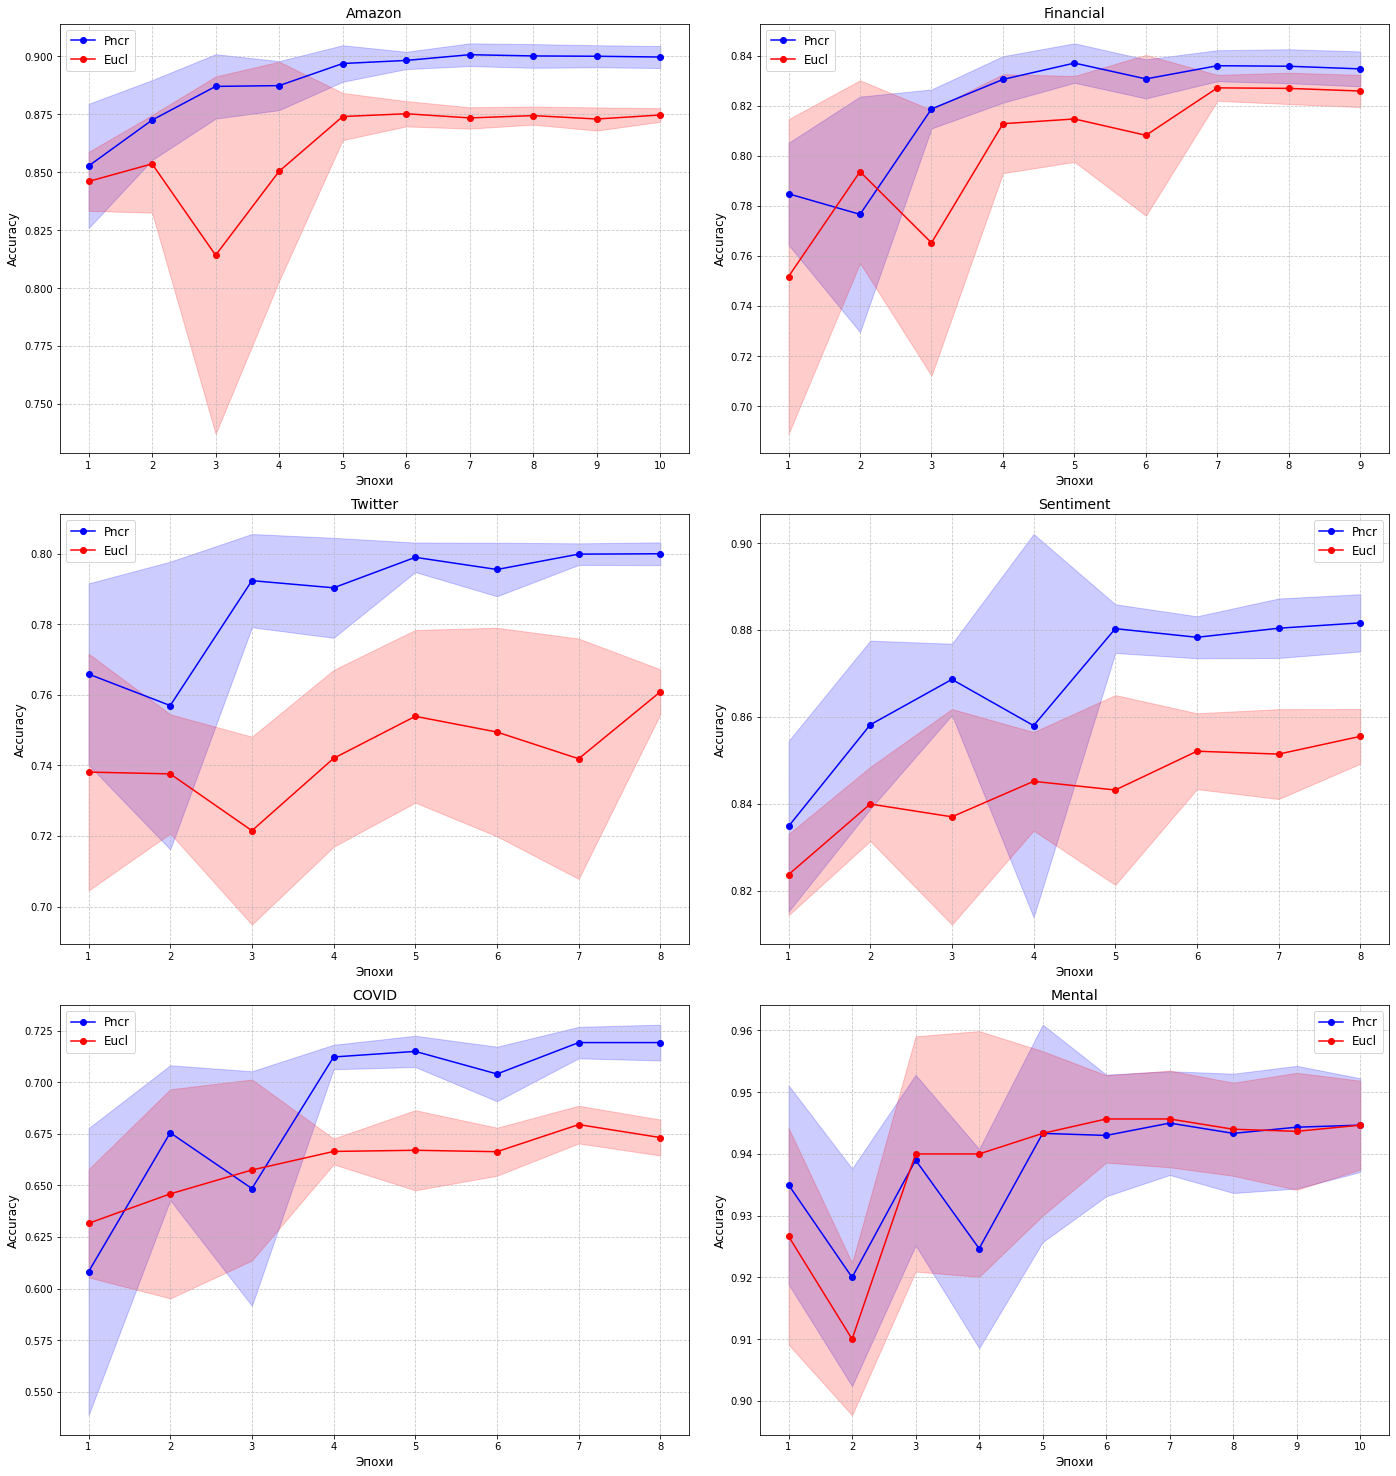

In [114]:
import matplotlib.pyplot as plt
import math

nn = 2
# Список датасетов
datasets = ['Amazon', 'Financial', 'Twitter', 'Sentiment', 'Corobka Windows', 'Mental']

# Вычисляем количество строк для subplot
n_datasets = len(datasets)
n_rows = math.ceil(n_datasets / nn)
n_cols = min(nn, n_datasets)

# Создаем фигуру с несколькими subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7*n_rows))
fig.tight_layout(pad=4.0)

# Если у нас только один ряд, делаем axes двумерным для единообразия
if n_rows == 1:
    axes = axes.reshape(1, -1)

# Проходим по всем датасетам
for i, dataset in enumerate(datasets):
    metrics_pncr = agg_metrics_pncr[dataset]
    metrics_eucl = agg_metrics_eucl[dataset]
    
    # Определяем позицию subplot
    row = i // nn
    col = i % nn
    
    # Получаем текущий axes
    ax = axes[row, col]
    
    min_epochs = min(len(metrics_pncr['avg_accuracy']), len(metrics_eucl['avg_accuracy']))
    epochs = range(1, min_epochs + 1)
    
    # Построение графиков с областями стандартного отклонения
    ax.plot(epochs, metrics_pncr['avg_accuracy'][:min_epochs], marker='o', color='b', label='Pncr')
    ax.fill_between(epochs, 
                   metrics_pncr['avg_accuracy'][:min_epochs] - metrics_pncr['std_accuracy'][:min_epochs],
                   metrics_pncr['avg_accuracy'][:min_epochs] + metrics_pncr['std_accuracy'][:min_epochs],
                   color='b', alpha=0.2)
    
    ax.plot(epochs, metrics_eucl['avg_accuracy'][:min_epochs], marker='o', color='r', label='Eucl')
    ax.fill_between(epochs,
                   metrics_eucl['avg_accuracy'][:min_epochs] - metrics_eucl['std_accuracy'][:min_epochs],
                   metrics_eucl['avg_accuracy'][:min_epochs] + metrics_eucl['std_accuracy'][:min_epochs],
                   color='r', alpha=0.2)
    
    # Настройки графика
    ax.set_title('COVID' if dataset == 'Corobka Windows' else dataset, fontsize=14)
    ax.set_xlabel('Эпохи', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks(epochs)

# Скрываем пустые subplots, если количество датасетов не кратно 3
for i in range(n_datasets, n_rows * n_cols):
    row = i // nn
    col = i % nn
    axes[row, col].axis('off')

plt.show()

In [106]:
for dataset in ['Amazon', 'Financial', 'Twitter', 'Sentiment', 'Corobka Windows', 'Mental']:
    print(dataset, agg_metrics_pncr[dataset]['avg_f1'][-1], agg_metrics_pncr[dataset]['std_f1'][-1])

KeyError: 'avg_f1'

In [107]:
for dataset in ['Amazon', 'Financial', 'Twitter', 'Sentiment', 'Corobka Windows', 'Mental']:
    print(dataset, agg_metrics_eucl[dataset]['avg_f1'][-1], agg_metrics_eucl[dataset]['std_f1'][-1])

KeyError: 'avg_f1'

In [51]:
agg_metrics_pncr = agg_mertics(poincare_metrics, metric='f1')
agg_metrics_eucl = agg_mertics(euclide_metrics, metric='f1')

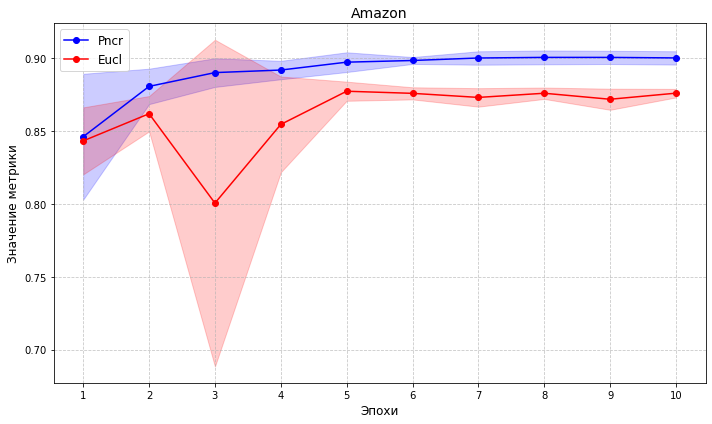

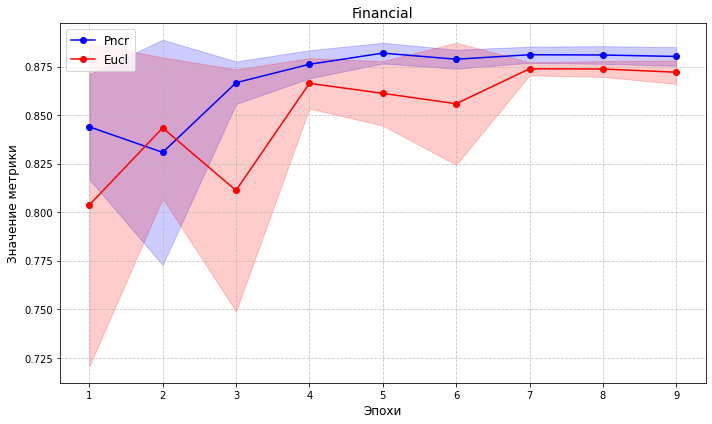

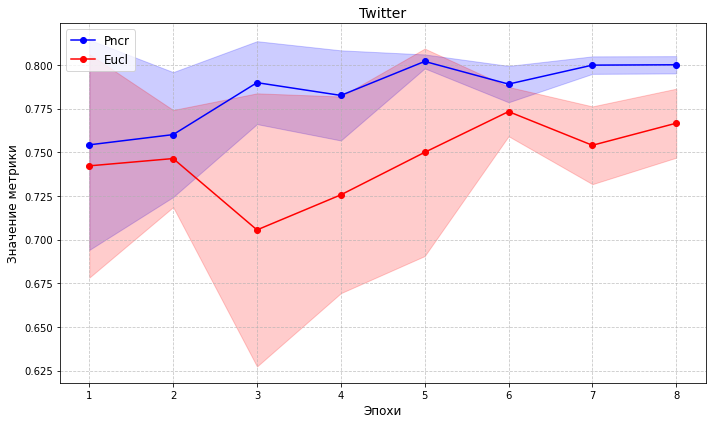

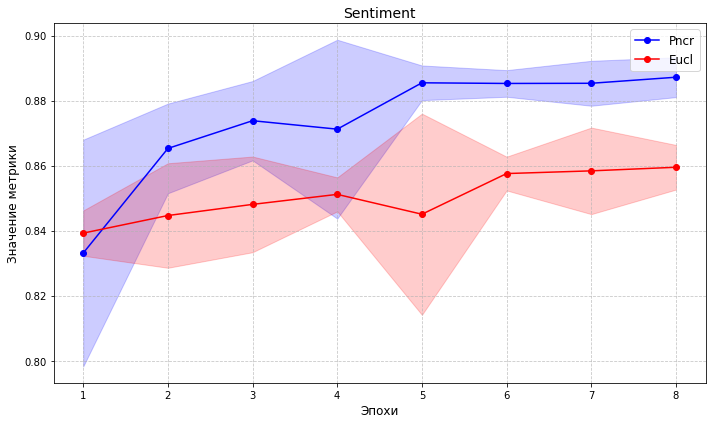

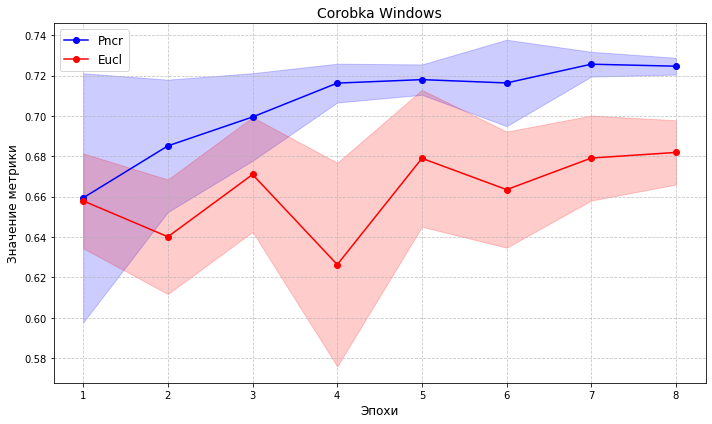

In [52]:
metric = 'f1'
for dataset in ['Amazon', 'Financial', 'Twitter', 'Sentiment', 'Corobka Windows']:
    
    metrics_pncr = agg_metrics_pncr[dataset]
    metrics_eucl = agg_metrics_eucl[dataset]
    
    plt.figure(figsize=(10, 6))
    
    min_epochs = min(len(metrics_pncr[f'avg_{metric}']), len(metrics_eucl[f'avg_{metric}']))
    epochs = range(1, min_epochs + 1)
#     epochs_pncr = range(1, len(metrics_pncr[f'avg_{metric}'])+1)
#     epochs_eucl = range(1, len(metrics_eucl[f'avg_{metric}'])+1)
    
    
    # Построение линии средних значений
    plt.plot(epochs, metrics_pncr[f'avg_{metric}'][:min_epochs], marker='o', color='b', label='Pncr')
    plt.plot(epochs, metrics_eucl[f'avg_{metric}'][:min_epochs], marker='o', color='r', label='Eucl')

    # Добавление области стандартного отклонения
    plt.fill_between(epochs, 
                     metrics_pncr[f'avg_{metric}'][:min_epochs] - metrics_pncr[f'std_{metric}'][:min_epochs], 
                     metrics_pncr[f'avg_{metric}'][:min_epochs] + metrics_pncr[f'std_{metric}'][:min_epochs], 
                     color='b', alpha=0.2)
    plt.fill_between(epochs, 
                     metrics_eucl[f'avg_{metric}'][:min_epochs] - metrics_eucl[f'std_{metric}'][:min_epochs], 
                     metrics_eucl[f'avg_{metric}'][:min_epochs] + metrics_eucl[f'std_{metric}'][:min_epochs], 
                     color='r', alpha=0.2)

    # Настройка графика
    plt.xlabel('Эпохи', fontsize=12)
    plt.ylabel('Значение метрики', fontsize=12)
    plt.title(dataset, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(epochs)
    plt.tight_layout()

    plt.show()

In [34]:
with open(r'D:\downloads from inet\poincare_metrics_c.pkl', 'rb') as f:
    poincare_metrics = pickle.load(f)


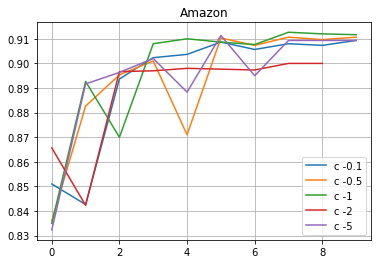

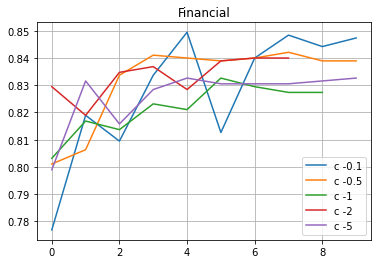

In [37]:
for dataset in ['Amazon', 'Financial']:
    for c in poincare_metrics[dataset].keys():
        plt.plot(poincare_metrics[dataset][c]['accuracy'], label=c)
    plt.grid()
    plt.legend()
    plt.title(dataset)
    plt.show()